In [3]:
import pandas as pd
df = pd.read_csv('/content/advertising_sales_data.csv')


In [4]:
average_tv_advertising = df['TV'].mean()

# Print the result
print(f"The average amount spent on TV advertising is: {average_tv_advertising}")

The average amount spent on TV advertising is: 147.0425


In [5]:
correlation_radio_sales = df['Radio'].corr(df['Sales'])

# Print the result
print(f"The correlation between radio advertising expenditure and product sales is: {correlation_radio_sales}")

The correlation between radio advertising expenditure and product sales is: 0.3497277129207837


In [6]:
correlation_tv_sales = df['TV'].corr(df['Sales'])
correlation_radio_sales = df['Radio'].corr(df['Sales'])
correlation_newspaper_sales = df['Newspaper'].corr(df['Sales'])

# Print the results
print(f"Correlation between TV advertising expenditure and product sales: {correlation_tv_sales}")
print(f"Correlation between Radio advertising expenditure and product sales: {correlation_radio_sales}")
print(f"Correlation between Newspaper advertising expenditure and product sales: {correlation_newspaper_sales}")

# Determine which advertising medium has the highest impact
highest_impact = max(correlation_tv_sales, correlation_radio_sales, correlation_newspaper_sales)
if highest_impact == correlation_tv_sales:
    medium = "TV"
elif highest_impact == correlation_radio_sales:
    medium = "Radio"
else:
    medium = "Newspaper"

print(f"The advertising medium with the highest impact on sales is: {medium}")

Correlation between TV advertising expenditure and product sales: 0.9012079133023306
Correlation between Radio advertising expenditure and product sales: 0.3497277129207837
Correlation between Newspaper advertising expenditure and product sales: 0.15796002615492621
The advertising medium with the highest impact on sales is: TV


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [10]:
df.dropna(inplace=True)

In [11]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

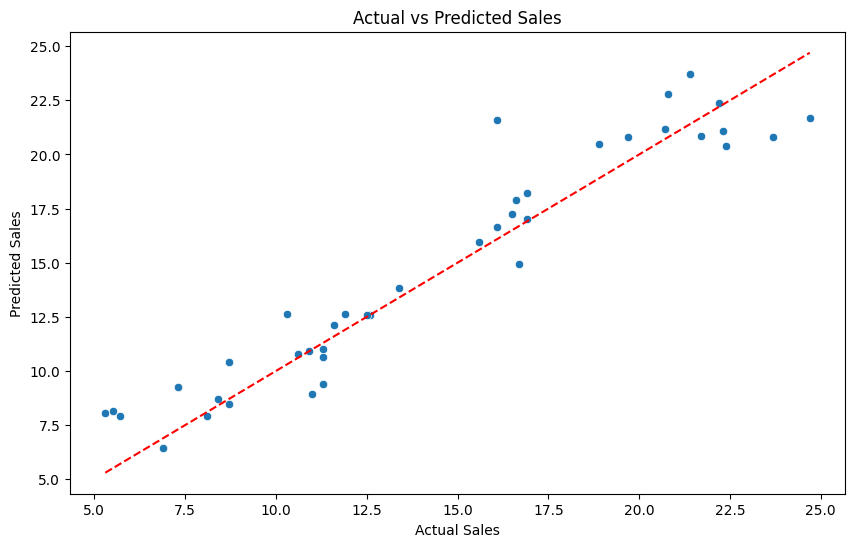

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [16]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 4.7145814110038415
Coefficients: [0.05450899 0.10096678 0.00431997]


In [17]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2.9074318865000555


In [18]:
new_data = np.array([[200, 40, 50]])
new_data_imputed = imputer.transform(new_data)
predicted_sales = model.predict(new_data_imputed)
print('Predicted Sales for new data (TV=200, Radio=40, Newspaper=50):', predicted_sales[0])

Predicted Sales for new data (TV=200, Radio=40, Newspaper=50): 19.87104920920664


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


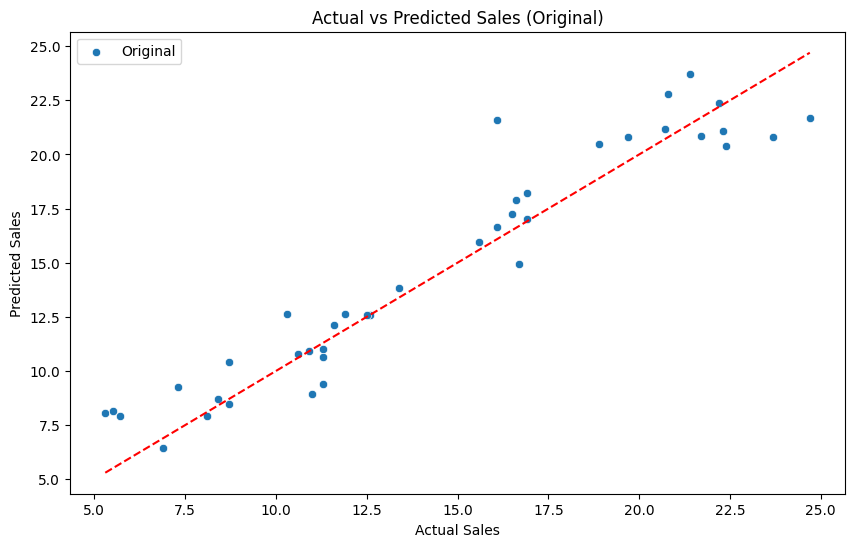

In [19]:
# Plot the actual vs predicted sales values for original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Original')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Original)')
plt.legend()
plt.show()

In [20]:
#When data is normalised
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse_original = mean_squared_error(y_test, y_pred)

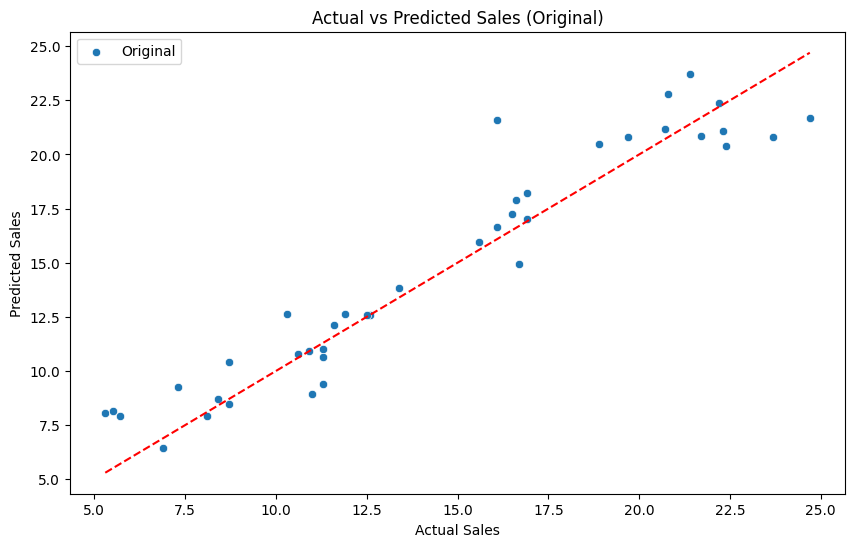

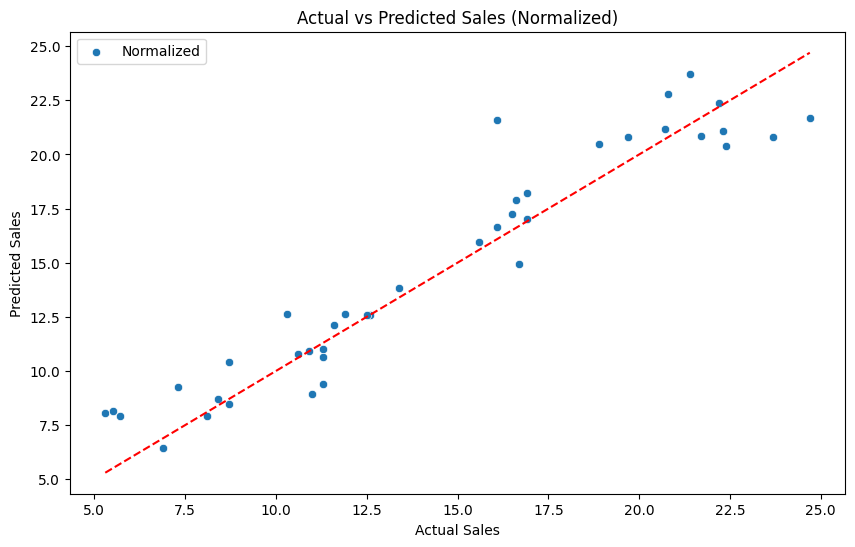

Mean Squared Error (Original): 2.9074318865000555
Mean Squared Error (Normalized): 2.9074318865000564


In [24]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions on the test set with normalized data
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate Mean Squared Error for normalized data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

# Plot the actual vs predicted sales values for original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Original')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Original)')
plt.legend()
plt.show()

# Plot the actual vs predicted sales values for normalized data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_scaled, label='Normalized')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Normalized)')
plt.legend()
plt.show()

# Print the Mean Squared Errors
print('Mean Squared Error (Original):', mse_original)
print('Mean Squared Error (Normalized):', mse_scaled)

In [25]:
#the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors
X = df[['Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 21.045362133902056
R^2 Score: -0.05191341464060373
